<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/YB_2%EC%A1%B0_mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/EWHA/ESAA/mini_project_1/movies_train.csv')

In [5]:
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
df.info() #데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
print(df.isnull().sum()) #결측치 있는 열 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64


In [8]:
df['dir_prev_bfnum'] = df['dir_prev_bfnum'].fillna(0) #결측치 0으로 채우기
print(df['dir_prev_bfnum'].isnull().sum()) #채우고 결측치 수 다시 확인

0


In [9]:
#이상치 확인
Q1 = df['box_off_num'].quantile(0.25)
Q3 = df['box_off_num'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['box_off_num'] < lower) | (df['box_off_num'] > upper)]
out_num = outliers['box_off_num']

print(f'관객수 이상치 개수: {len(out_num)}')


관객수 이상치 개수: 97


In [11]:
df['log_box_off_num'] = np.log1p(df['box_off_num'])

In [13]:
df.head() #이상치 로그 변환 결과 확인

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,log_box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,10.060449
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,15.771725
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,15.755558
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,12.291640
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,13.088575


In [10]:
df['release_time'] = pd.to_datetime(df['release_time']) #datetime형으로 변환
print(df.info()) #변환 여부 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB
None


#장르별 선호 개봉 시기 간의 상관관계

In [14]:
df['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [15]:
df['genre'] = df['genre'].astype('category') #장르명을 범주형 변수로 변경

In [20]:
# df['genre'].unique() 값에 해당하는 매핑 딕셔너리 생성 - 한글명은 그래프에서 출력 어려움.
genre_mapping = {
    '액션': 'Action',
    '느와르': 'Noir',
    '코미디': 'Comedy',
    '다큐멘터리': 'Documentary',
    '뮤지컬': 'Musical',
    '공포': 'Horror',
    '서스펜스': 'Suspense',
    '애니메이션': 'Animation',
    '미스터리': 'Mystery',
    'SF': 'SF'
}

In [22]:
# df['genre'] 열의 값을 영어로 변경
df['genre'] = df['genre'].map(genre_mapping)

# 변경된 결과 확인
print(df['genre'].unique())

['Action' 'Noir' 'Comedy' 'Documentary' 'Musical' nan 'Horror' 'Suspense'
 'Animation' 'Mystery' 'SF']


In [23]:
import seaborn as sns

In [24]:
# '월'과 '요일' 변수 생성
df['month'] = df['release_time'].dt.month
df['day_of_week'] = df['release_time'].dt.dayofweek
# dayofweek는 0(월요일)부터 6(일요일)까지

In [71]:
df['genre'].value_counts()

,count
genre,
Documentary,93
Comedy,53
Horror,42
Action,28
Noir,27
Animation,21
Mystery,17
SF,13
Musical,5


## 장르별 개봉 월의 분포

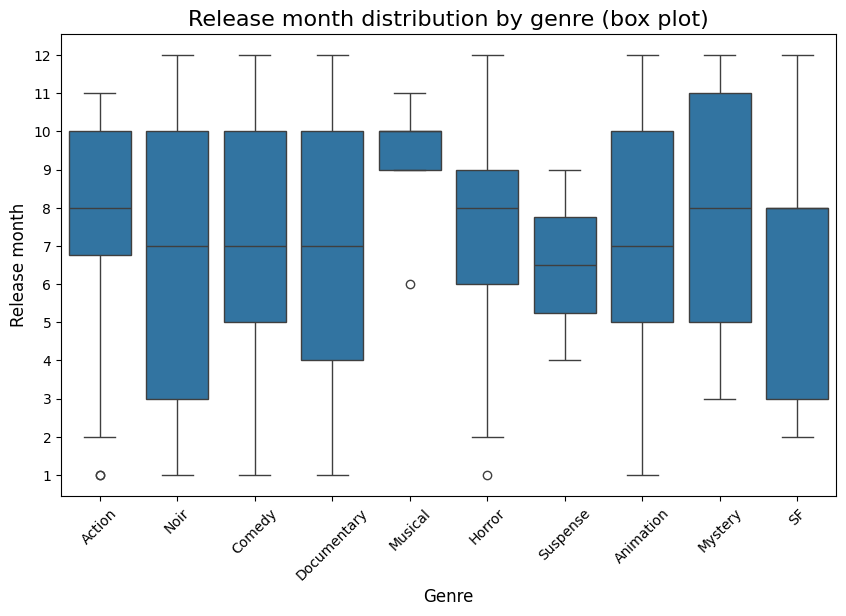

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='month', data=df)
plt.title('Release month distribution by genre (box plot)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Release month', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(1,13))

plt.show()

Musical장르의 박스 길이가 가장 짧음. 데이터가 밀집되어있음  
Horror 영화가 여름에 많이 개봉할 것이라는 가설에 적합. (6~9월에 박스 분포)

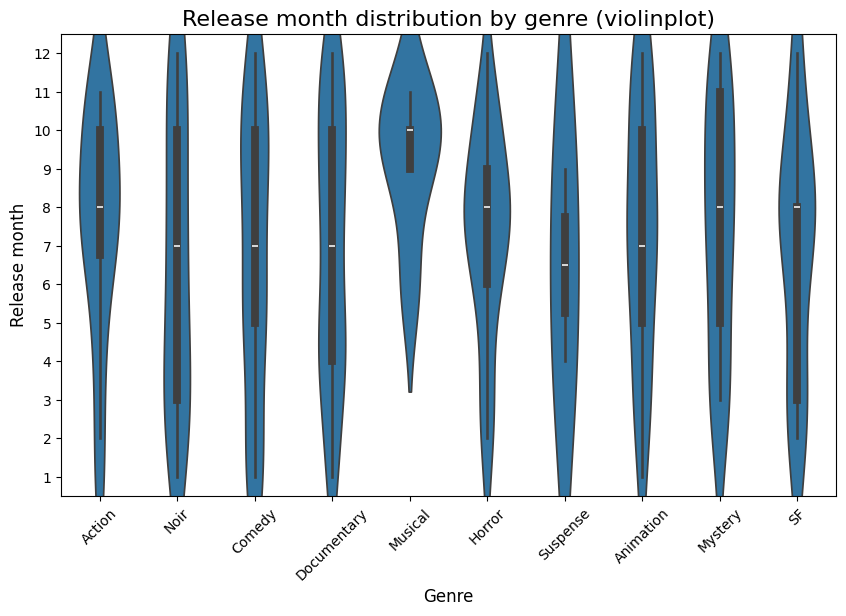

In [64]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='genre', y='month', data=df)
plt.title('Release month distribution by genre (violinplot)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Release month', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(1,13))

plt.ylim(0.5, 12.5) # 바이올린플롯 그래프의 특성상 확장된 부분을 잘라냄

plt.show()

Musical 장르에서 뚜렷한 밀집구간을 가짐. 9,10월에 집중적으로 개봉하는 경향이 있는듯함.  
Action, Horror, SR를 제외하고는 바이올린 플롯의 너비가 대체적으로 비슷함. 데이터가 넓은 범위에 고르게 분포되어있음.

## 선호 개봉 요일

In [46]:
df['day_of_week'].unique()

array([3, 2, 0, 4, 5, 1], dtype=int32)

'6'값이 출력되지 않음. 즉 일요일에 개봉한 영화가 없음.

In [70]:
df['day_of_week'].value_counts()

,count
day_of_week,
3,484
2,107
0,4
4,2
1,2
5,1


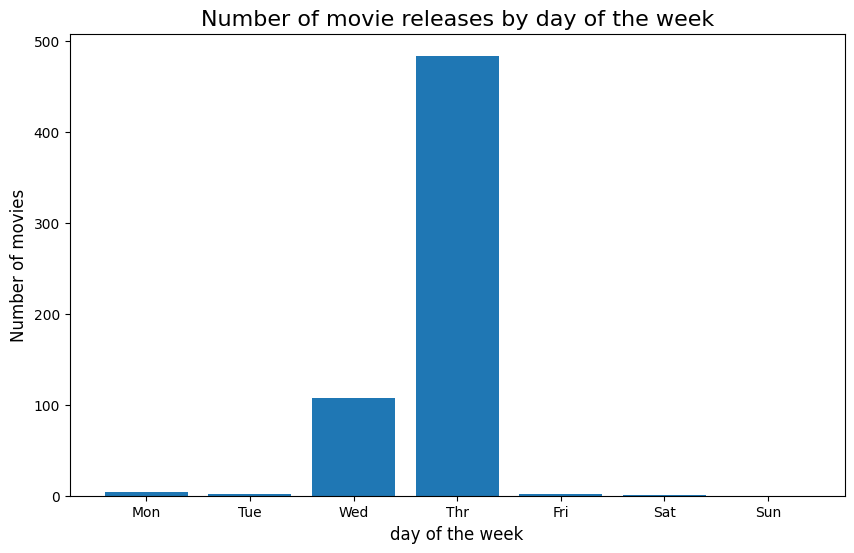

In [54]:
# 요일 이름을 레이블로 사용 (0=월요일, 6=일요일)
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thr', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_week_name'] = df['day_of_week'].map(day_map)

# 장르와 상관없이 요일별 개봉 영화 수 계산
release_counts_by_day = df['day_of_week_name'].value_counts()

# 모든 요일을 포함하도록 인덱스 재정렬 (데이터가 없는 일요일도 0으로 표시)
all_days_order = list(day_map.values())
full_counts = release_counts_by_day.reindex(all_days_order, fill_value=0)

# 4. plt.bar를 사용해 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(full_counts.index, full_counts.values)

plt.title('Number of movie releases by day of the week', fontsize=16)
plt.xlabel('day of the week', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)
plt.xticks(rotation=0)
plt.show()

목요일이 압도적으로 개봉 영화수가 많고, 수요일 개봉 영화수가 다음으로 많음.  
월요일이 3번째로 개봉 영화수가 많으나, 사실상 수요일과 목요일에 비하면 다른 요일의 영화 개봉 수 차이는 미미함.

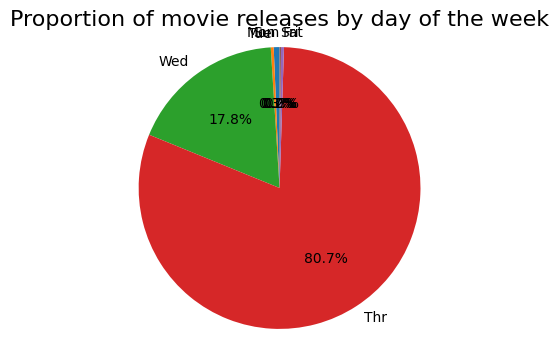

In [69]:
plt.figure(figsize=(4, 4))
plt.pie(full_counts.values, labels=full_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of movie releases by day of the week', fontsize=16)
plt.axis('equal')

plt.show()

파이차트로 확인해봐도, 전체 영화의 80.7%가 목요일에 개봉하였고, 17.8%가 수요일에 개봉했음을 알 수 있음.  
나머지 1.5%만이 월,화,금,토,일요일에 개봉함.

 ### 2014년 전후 수요일 개봉 영화 차이
 2014년 1월부터 시행하는 매달 마지막 수요일을 문화가 있는 날로 제정한 '문화가 있는 날'의 영향이 있는지 분석해보고자 함.

In [75]:
# df['release_year']와 df['day_of_week'] 열 생성
df['release_year'] = df['release_time'].dt.year


In [76]:
# 2014년 이전 데이터 (2014년 제외)
df_before_2014 = df[df['release_year'] < 2014]

# 2014년 이후 데이터 (2014년 포함)
df_since_2014 = df[df['release_year'] >= 2014]

In [77]:
# 1. 2014년 이전 비율 계산
total_before = len(df_before_2014)
wednesday_before = len(df_before_2014[df_before_2014['day_of_week'] == 2])
proportion_before = wednesday_before / total_before if total_before > 0 else 0

# 2. 2014년 이후 비율 계산
total_since = len(df_since_2014)
wednesday_since = len(df_since_2014[df_since_2014['day_of_week'] == 2])
proportion_since = wednesday_since / total_since if total_since > 0 else 0

# 결과 출력
print(f"2014년 이전 수요일 개봉 영화 비율: {proportion_before:.2%}")
print(f"2014년 이후 수요일 개봉 영화 비율: {proportion_since:.2%}")

2014년 이전 수요일 개봉 영화 비율: 16.15%
2014년 이후 수요일 개봉 영화 비율: 20.24%


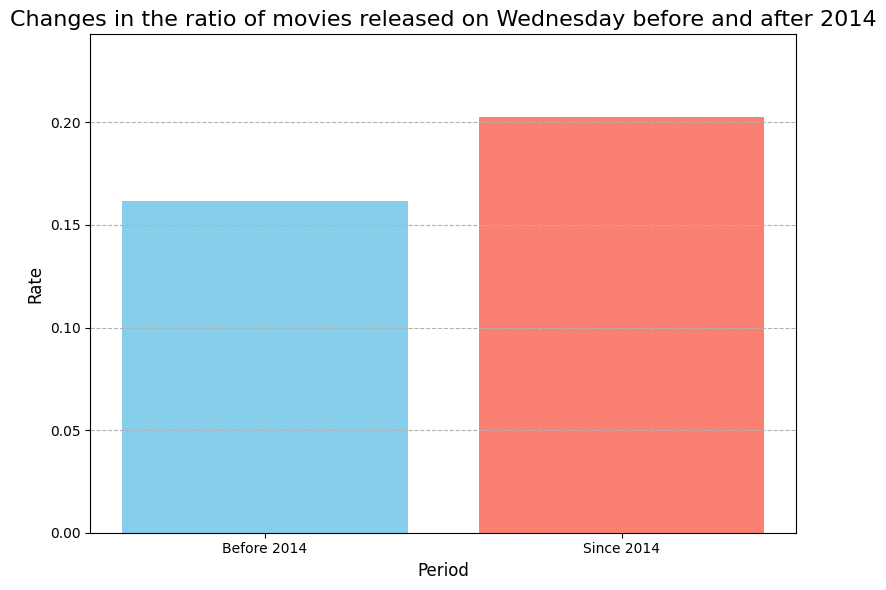

In [80]:
# 비율 데이터를 데이터프레임으로 생성 ... (그냥 재미로 해봄)
proportions = pd.DataFrame({
    'Period': ['Before 2014', 'Since 2014'],
    'Proportion': [proportion_before, proportion_since]
})

plt.figure(figsize=(8, 6))
plt.bar(proportions['Period'], proportions['Proportion'], color=['skyblue', 'salmon'])

plt.title('Changes in the ratio of movies released on Wednesday before and after 2014', fontsize=16)
plt.ylabel('Rate', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(0, max(proportion_before, proportion_since) * 1.2) # y축 범위 조정
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## 장르별 선호 개봉 요일

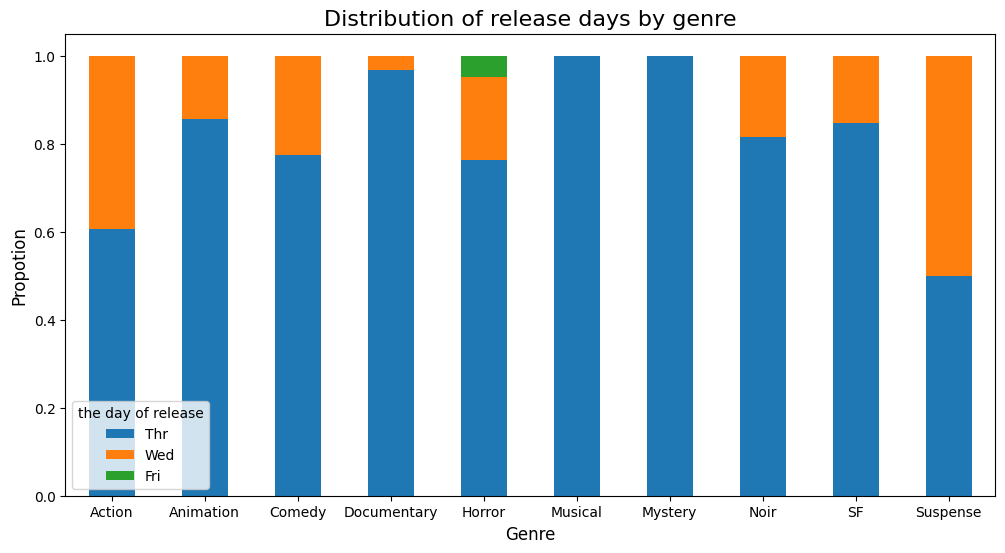

In [50]:
# 요일 이름을 레이블로 사용 (0=월요일, 6=일요일)
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thr', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_week_name'] = df['day_of_week'].map(day_map)

# 1. 장르와 요일별로 그룹화하여 개수 집계
genre_by_day = df.groupby(['genre', 'day_of_week_name']).size().unstack(fill_value=0)

# 2. 각 장르의 총합으로 나누어 비율 계산 (axis=1을 사용해 행별 합계로 나눔)
genre_proportions = genre_by_day.div(genre_by_day.sum(axis=1), axis=0)

# 3. 스택형 막대 그래프 그리기
genre_proportions.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribution of release days by genre', fontsize=16)
plt.ylabel('Propotion', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='the day of release')
plt.show()

전체 영화의 80%가 목요일에 개봉했다보니, 장르별 개봉 요일을 분석했을 때도 목요일의 비율이 높은 편.  
그나마 Suspense, Action 장르에서 수요일 개봉 비율이 약 40%를 나타냄. 다음으로는 Comedy, Horror 장르가 있음.  
독특한 점은 Horror 장르에서만 금요일 개봉 비율이 유의미하게 높음.

In [73]:
df[df['day_of_week']==4]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,log_box_off_num,month,day_of_week,day_of_week_name
93,화창한 그날들,(주)온비즈넷,Horror,2014-03-14,90,청소년 관람불가,방현준,0.0,0,12,3,310,5.739793,3,4,Fri
129,기생령,(주)이스트스카이필름,Horror,2011-08-05,92,청소년 관람불가,고석진,0.0,0,88,4,96992,11.482394,8,4,Fri


금요일에 개봉한 2개의 영화가 모두 Horror장르이기 때문인 듯함.  
Horror 영화 42개 중 2개의 영화가 금요일에 개봉, 즉 4.76%의 수치로 그래프에 나타난 것.